## Cubic model

In [1]:
import numpy as np
import math

np.random.seed(0)

# Create random input and output data 
n = 2000 
x = np.linspace(-math.pi, math.pi, n)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 2e-6

for t in range(n): 
    
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 1361.8499140689319
199 668.3361766830536
299 331.1834285885748
399 166.78663286015194
499 86.40606796449609
599 47.00588655274185
699 27.64893661597997
799 18.119352854567097
899 13.419098066846875
999 11.09691017012662
1099 9.947894584028148
1199 9.378599606946874
1299 9.096197475512549
1399 8.955961338071576
1499 8.886256808302706
1599 8.851581197208887
1699 8.83431855977986
1799 8.825719075393796
1899 8.82143273795843
1999 8.819295173766172
Result: y = 0.0015272394997871707 + 0.8565450670436242 x + -0.0002634742270882626 x^2 + -0.09330254160514122 x^3


## Polynomial model (arbitrary degree)

In [2]:
# Set degree 
d = 7

np.random.seed(0)

# Create random input data 
n = 1001 
x = np.linspace(-1, 1, n)

# Target data
b = np.random.randn(d+1)
y = np.sin(np.pi * x) 

# Generate array of powers of x 
X = np.ones((n, d+1)) 
for j in range(1, d+1): 
    X[:, j] = X[:, j-1] * x 

# Randomly initialize weights
a = np.random.randn(d+1) 
T = 100000                   # learning steps 
e = T // 10                  # epoch length 
l = len(str(T))              # string length for formatting

A = np.zeros((T+1, d+1))     # initialize coefficient array 
A[0] = a

learning_rate = 1e-5

for t in range(T): 

    # Forward pass: compute predicted y
    # y = a_0 + a_1 x + ... + a_{d-1} x^{d-1} + a_d x^d 
    y_pred = np.dot(X, a) 

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % e == e-1:
        print(str(t).rjust(l), loss)

    # Backprop to compute gradients of a_0, ..., a_d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y) 
    grad_a = np.dot(grad_y_pred, X)     
    
    # Update weights
    a -= learning_rate * grad_a 
    A[t+1] = a

print('\nResult: y = a_0 + a_1 x + ... + a_d x^d')
for j in range(d+1): 
    print('a_{} = {}'.format(j, a[j])) 

  9999 22.877723347157993
 19999 11.86837271451848
 29999 6.282957628672127
 39999 3.439900722492948
 49999 1.9912503505414954
 59999 1.2519859699918852
 69999 0.8736417982722382
 79999 0.6789395627645378
 89999 0.577689850937288
 99999 0.5240089757757239

Result: y = a_0 + a_1 x + ... + a_d x^d
a_0 = 0.0034100679146546672
a_1 = 2.8976384924680634
a_2 = -0.0661791658938293
a_3 = -3.29586907349265
a_4 = 0.18998462210091233
a_5 = -1.1996656542839004
a_6 = -0.13537053554782816
a_7 = 1.6457714669865986


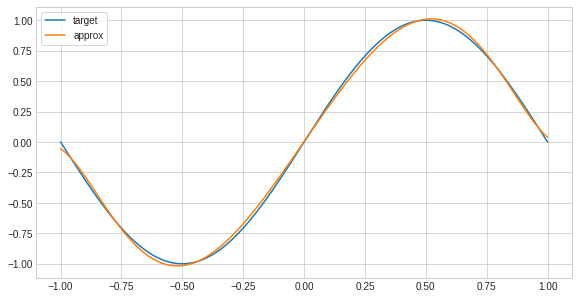

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
plt.style.use('seaborn-whitegrid') 

fig, ax = plt.subplots(figsize=(10, 5)) 
# ax.set_ylim(-2, 2) 
ax.set_aspect(1/2)
ax.plot(x, y, label='target') 
ax.plot(x, y_pred, label='approx') 
ax.legend(loc='upper left', frameon=True, fancybox=True); 

## Plots

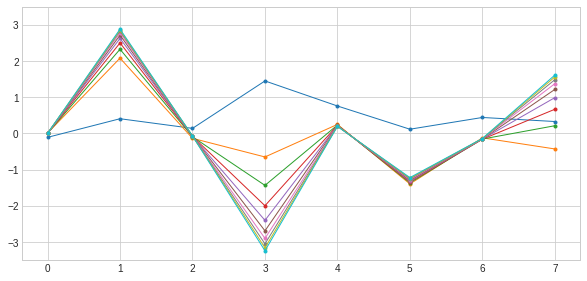

In [4]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.set_ylim(-3.5, 3.5) 
ax.set_aspect(1/2) 
ax.plot(A[1::e, :].T, '.-', lw=1); 

<IPython.core.display.Javascript object>


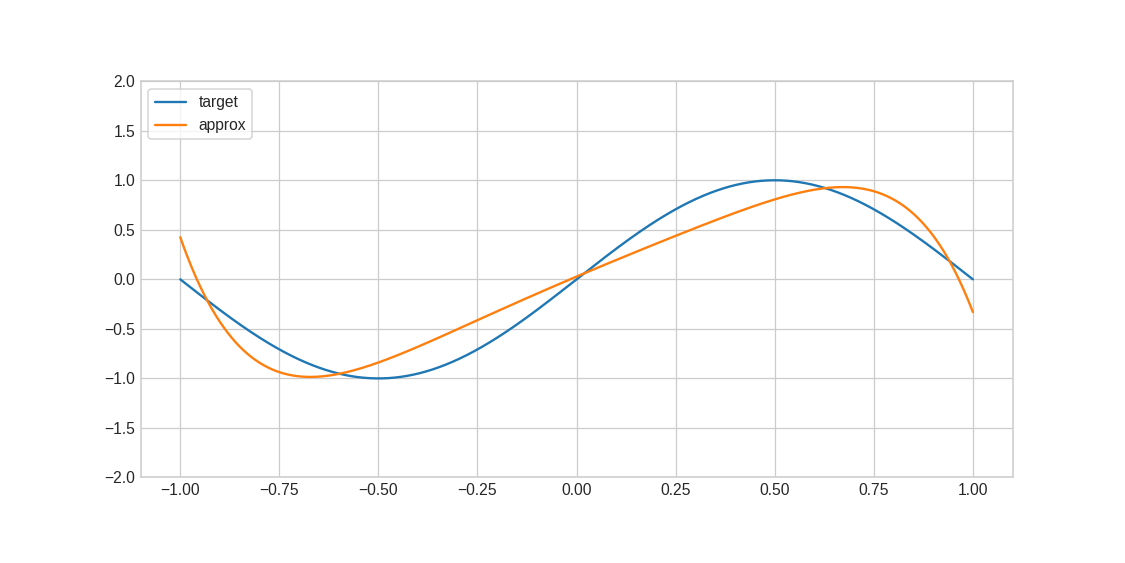

In [5]:
%matplotlib notebook
import matplotlib.animation as animation
plt.style.use('seaborn-whitegrid') 

fig, ax = plt.subplots(figsize=(10, 5)) 
ax.set_ylim(-2, 2) 
ax.set_aspect(1/4)
ax.plot(x, y, label='target') 
line, = ax.plot([], [], label='approx') 
ax.legend(loc='upper left', frameon=True, fancybox=True); 

def animate(i): 
    y_pred = np.dot(X, A[i]) 
    line.set_data(x, y_pred)    # update the data 
    return line, 

ani = animation.FuncAnimation(fig, animate, frames=T, interval=1, blit=True, save_count=50) 

plt.show();